In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('imdb.csv')
df.head()

,review,sentiment
0,"Okay, I know this does'nt project India in a g...",1
1,Despite John Travolta's statements in intervie...,0
2,"I am a kung fu fan, but not a Woo fan. I have ...",1
3,He seems to be a control freak. I have heard h...,0
4,"Admittedly, there are some scenes in this movi...",1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          10000 non-null  object
 1   sentiment       10000 non-null  int64 
 2   cleaned_review  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [4]:
df.describe()

,sentiment
count,10000.000000
mean,0.503700
std,0.500011
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
df.isnull().sum()

,0
review,0
sentiment,0


In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # remove brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove URLs
    text = re.sub(r'<.*?>+', '', text)  # remove HTML
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)  # remove numbers
    return text

In [7]:
df['cleaned_review'] = df['review'].apply(clean_text)

In [8]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment'].astype(int)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.6522 - loss: 0.6018 - val_accuracy: 0.8600 - val_loss: 0.3216
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9231 - loss: 0.2117 - val_accuracy: 0.8487 - val_loss: 0.3580
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9716 - loss: 0.1025 - val_accuracy: 0.8456 - val_loss: 0.4318
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.9906 - loss: 0.0386 - val_accuracy: 0.8431 - val_loss: 0.5491
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9979 - loss: 0.0131 - val_accuracy: 0.8394 - val_loss: 0.6600
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9996 - loss: 0.0052 - val_accuracy: 0.8381 - val_loss: 0.7267
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8388 - val_loss: 0.7779
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accu

In [13]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [14]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1010
           1       0.83      0.85      0.84       990

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8385


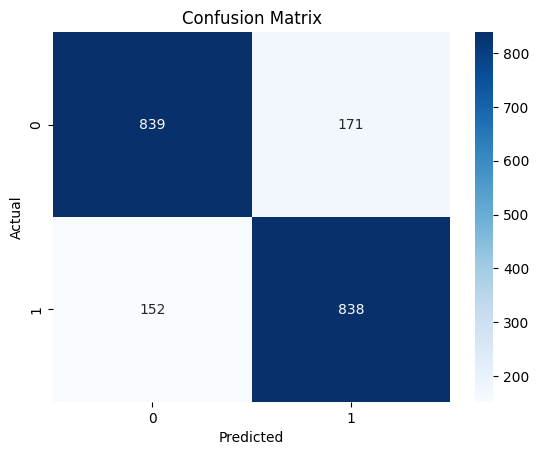

In [16]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()